In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
 # load dataset
 pd.read_csv("/content/WISDM_ar_v1.1_raw.txt")

ParserError: ignored

In [ ]:
# datapreprocessing 
file = open("/content/WISDM_ar_v1.1_raw.txt")
lines = file.readlines()
processedList = []
for i, line in enumerate(lines):
  try:
    line = line.split(",")
    last = line[5].split(";")[0]
    last = last.strip()
    if last== '':
      break
    temp = [line[0], line[1], line[2], line[3], line[4], last]
    processedList.append(temp)
  except:
    print("error at the line: ",i)


error at the line:  281873
error at the line:  281874
error at the line:  281875


In [ ]:
processedList


[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
columns = ["user","activity",  "time", "x", "y", "z"]

In [ ]:
data = pd.DataFrame(data = processedList, columns=columns)

In [ ]:

data.head(20)

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164
5,33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526
6,33,Jogging,49106542312000,-0.61291564,10.56939,5.706926
7,33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871
9,33,Jogging,49106872299000,0.95342433,1.3756552,1.6480621


In [ ]:
data.shape

(343416, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data["activity"].value_counts() # this are unbalaced so that if we noot balanced that data then we are getting baisd answer toward the walking 

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

### balance the data

In [ ]:
data["x"]= data["x"].astype("float")
data["y"]= data["y"].astype("float")
data["z"]= data["z"].astype("float")


In [ ]:
actitives = data["activity"].value_counts().index

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [ ]:
Fs = 20

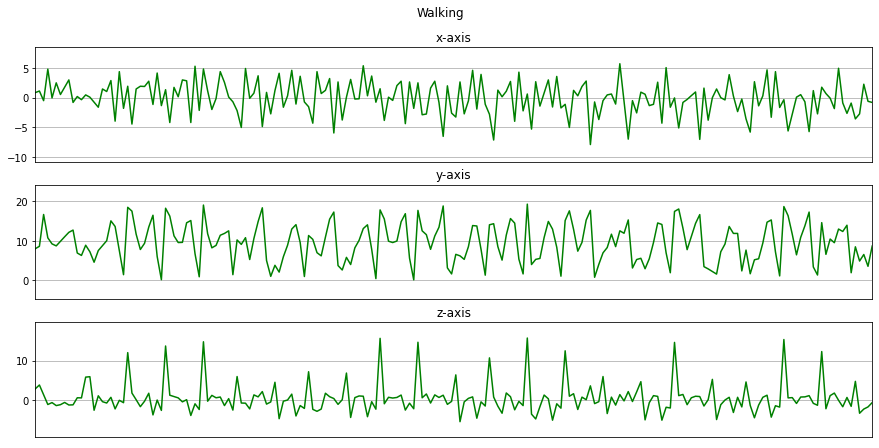

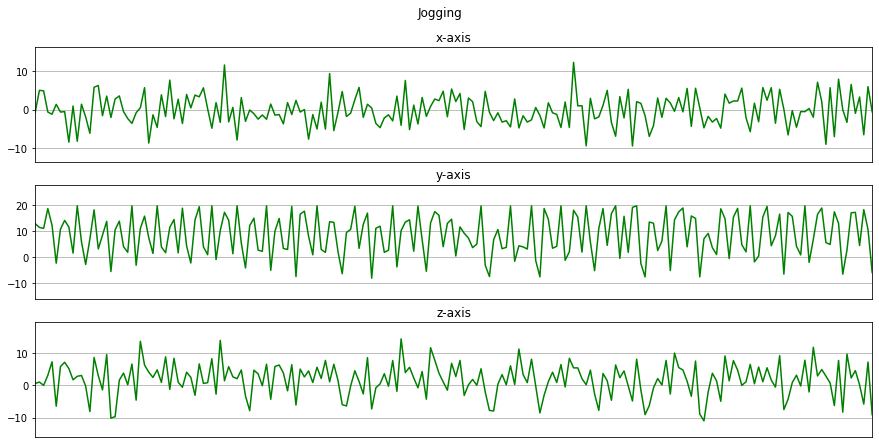

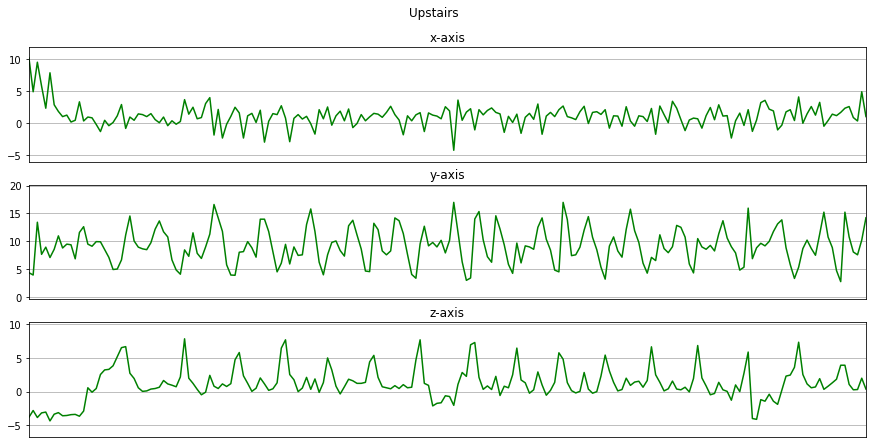

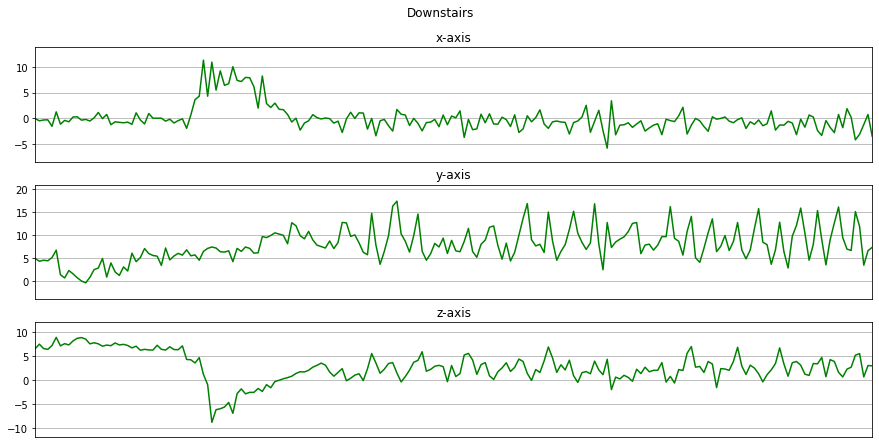

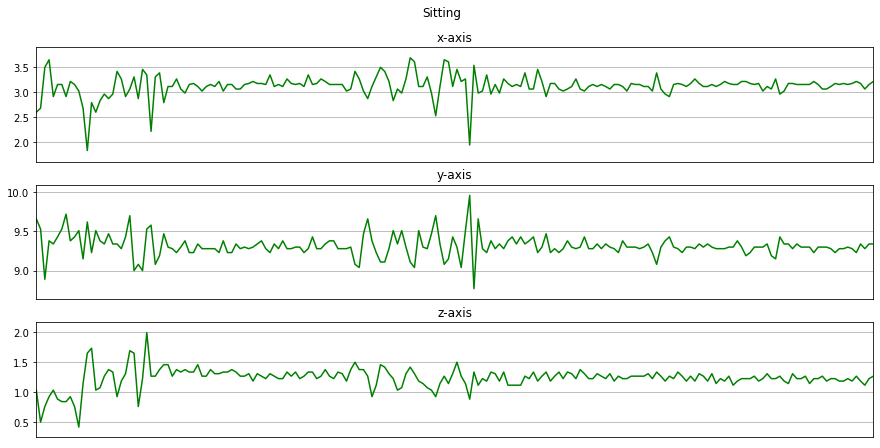

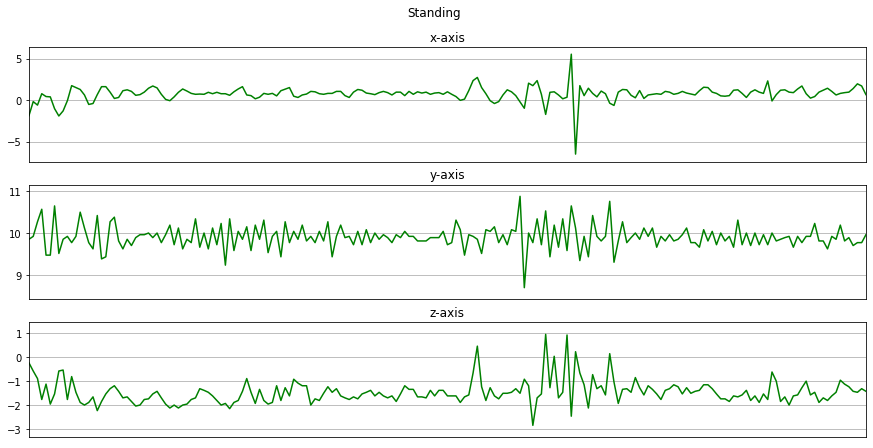

In [ ]:
def plot_activity(activity,data):
  fig, (ax0,ax1,ax2) = plt.subplots(nrows = 3, figsize = (15,7), sharex=True)
  plot_axis(ax0,data["time"],data["x"],"x-axis")
  plot_axis(ax1,data["time"],data["y"],"y-axis")
  plot_axis(ax2,data["time"],data["z"],"z-axis")
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=.90)
  plt.show()

def plot_axis(ax,x,y,title):
  ax.plot(x,y,"g")
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
  ax.set_xlim([min(x),max(x)])
  ax.grid(True)

for activity in actitives:
  data_for_plot = data[(data["activity"]==activity)][:Fs*10]
  plot_activity(activity,data_for_plot)

# New Section

In [ ]:
df = data.drop(["user",'time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df["activity"].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
Walking = df[df["activity"]=="Walking"].head(3555).copy()
Jogging = df[df["activity"]=="Jogging"].head(3555).copy()
Upstairs  = df[df["activity"]=="Upstairs"].head(3555).copy()
Downstairs = df[df["activity"]=="Downstairs"].head(3555).copy()
Sitting = df[df["activity"]=="Sitting"].head(3555).copy()
Standing = df[df["activity"]=="Standing"].head(3555).copy()


In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [ ]:
balanced_data["activity"].value_counts()

Upstairs      3555
Jogging       3555
Downstairs    3555
Sitting       3555
Standing      3555
Walking       3555
Name: activity, dtype: int64

In [ ]:
balanced_data.head()


,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
# label encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data["label"] = label.fit_transform(balanced_data["activity"])

In [ ]:
balanced_data

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5
...,...,...,...,...,...
257318,Standing,-0.910000,9.430000,2.533385,3
257319,Standing,-1.180000,9.510000,2.492524,3
257320,Standing,-1.500000,9.530000,2.533385,3
257321,Standing,-2.070000,8.770000,2.179256,3


In [ ]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
# standardise the x y z just bez of in their varience
X = balanced_data[["x","y","z"]]
y = balanced_data["label"]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=X,columns=["x","y","z"])
scaled_X["label"] = y.values

In [ ]:
scaler_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


# New Section

Frame preparation

In [ ]:
import scipy.stats as stats

In [ ]:
fs = 20
frame_size = fs*4  # 80
hop_size = fs*2

In [ ]:
def get_frames(df, frame_size, hop_size):
  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0,len(df)-frame_size, hop_size):
    x = df["x"].values[i: i+frame_size]
    y = df["y"].values[i: i+frame_size]
    z = df["z"].values[i: i + frame_size]

    label = stats.mode(df["label"][i : i + frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  frames = np.asarray(frames).reshape(-1,frame_size, N_FEATURES)
  lables = np.asarray(labels)

  return frames, labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)
type(X)

numpy.ndarray

In [ ]:
# X= np.array(X)
# y= np.array(y)
X.shape

(532, 80, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)

In [ ]:
X_train.shape,X_test.shape

((425, 80, 3), (107, 80, 3))

In [ ]:
X_train[0].shape,X_test[0].shape         # its is two dimension so cnn take 3d dimension so we can reshape

((80, 3), (80, 3))

In [ ]:
X_train = X_train.reshape(425,80,3,1)
X_test = X_test.reshape(107,80,3,1)


In [ ]:
X_train[0].shape,X_test[0].shape


AttributeError: ignored

In [ ]:
y_train=np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#### 2d CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation= "relu", input_shape= X_train[0].shape))
model.add(Dropout(0.1))
model.add(Conv2D(32, (2,2), activation="relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation = "softmax"))



In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
#print(np.X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data= (X_test, y_test), verbose=1)

Epoch 1/15
14/14 [==============================] - 0s 15ms/step - loss: 0.1594 - accuracy: 0.9529 - val_loss: 0.2287 - val_accuracy: 0.9252
Epoch 2/15
14/14 [==============================] - 0s 11ms/step - loss: 0.1464 - accuracy: 0.9600 - val_loss: 0.2313 - val_accuracy: 0.9159
Epoch 3/15
14/14 [==============================] - 0s 11ms/step - loss: 0.1016 - accuracy: 0.9765 - val_loss: 0.1994 - val_accuracy: 0.9065
Epoch 4/15
14/14 [==============================] - 0s 12ms/step - loss: 0.1095 - accuracy: 0.9671 - val_loss: 0.1881 - val_accuracy: 0.9065
Epoch 5/15
14/14 [==============================] - 0s 12ms/step - loss: 0.1322 - accuracy: 0.9459 - val_loss: 0.2034 - val_accuracy: 0.9252
Epoch 6/15
14/14 [==============================] - 0s 11ms/step - loss: 0.0930 - accuracy: 0.9694 - val_loss: 0.2025 - val_accuracy: 0.9159
Epoch 7/15
14/14 [==============================] - 0s 12ms/step - loss: 0.0904 - accuracy: 0.9788 - val_loss: 0.1864 - val_accuracy: 0.9159
Epoch 8/15
14